In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

In [2]:
# This problem has the following inputs: 
# 1. Frequency, in Hertzs. 
# 2. Angle of attack, in degrees. 
# 3. Chord length, in meters. 
# 4. Free-stream velocity, in meters per second. 
# 5. Suction side displacement thickness, in meters. 

# The only output is: 
# 6. Scaled sound pressure level, in decibels. 

In [3]:
feature_names = ['Frequency','Angle','Chord Length','velocity','displacement thickness','sound pressure']
airfoil = pd.read_csv("./airfoil_self_noise.csv",header=None,sep='\t',names=feature_names)

In [4]:
airfoil.head()

,Frequency,Angle,Chord Length,velocity,displacement thickness,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
airfoil = pd.DataFrame(airfoil)
airfoil.head()

,Frequency,Angle,Chord Length,velocity,displacement thickness,sound pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
frequency = pd.Series(airfoil['Frequency'])
frequency.value_counts().sort_values()

20000      6
16000     13
12500     25
200       35
250       42
10000     42
8000      52
315       56
400       69
500       78
630       88
6300      89
5000      95
800       97
1000      99
1250     100
4000     102
1600     103
3150     103
2500     104
2000     105
Name: Frequency, dtype: int64

In [7]:
data = pd.DataFrame(airfoil)
data.nunique()  # no. of unique values of each feature

Frequency                   21
Angle                       27
Chord Length                 6
velocity                     4
displacement thickness     105
sound pressure            1456
dtype: int64

In [8]:
corelation = airfoil.corr('pearson') 

In [9]:
corelation['sound pressure'].sort_values()

Frequency                -0.390711
displacement thickness   -0.312670
Chord Length             -0.236162
Angle                    -0.156108
velocity                  0.125103
sound pressure            1.000000
Name: sound pressure, dtype: float64

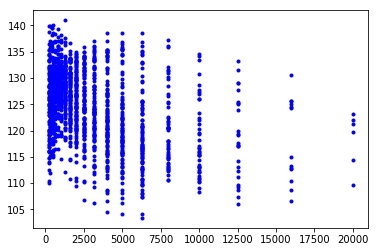

In [42]:
x= airfoil['Frequency']
x2 = airfoil['velocity']
y = airfoil['sound pressure']
plt.plot(x,y,'b.')

In [43]:
#airfoil.value_counts()

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
x

0         800
1        1000
2        1250
3        1600
4        2000
5        2500
6        3150
7        4000
8        5000
9        6300
10       8000
11      10000
12      12500
13      16000
14        500
15        630
16        800
17       1000
18       1250
19       1600
20       2000
21       2500
22       3150
23       4000
24       5000
25       6300
26       8000
27      10000
28      12500
29        200
        ...  
1473      200
1474      250
1475      315
1476      400
1477      500
1478      630
1479      800
1480     1000
1481     1250
1482     1600
1483     2000
1484     2500
1485     3150
1486     4000
1487      200
1488      250
1489      315
1490      400
1491      500
1492      630
1493      800
1494     1000
1495     1250
1496     1600
1497     2000
1498     2500
1499     3150
1500     4000
1501     5000
1502     6300
Name: Frequency, Length: 1503, dtype: int64

In [48]:
x.shape

(1503,)

In [13]:
scaler = MinMaxScaler()

In [40]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [41]:
x

array([[0.03030303],
       [0.04040404],
       [0.0530303 ],
       ...,
       [0.19191919],
       [0.24242424],
       [0.30808081]])

In [15]:
x.shape

(1503, 1)

In [16]:
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

C:\Users\Shilpa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


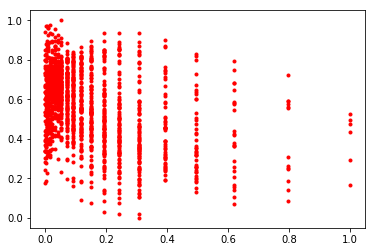

In [17]:
plt.plot(x,y,'r.')

In [18]:
from sklearn.model_selection import train_test_split 

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor = LinearRegression() 

In [22]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
y_pred = regressor.predict(x_test)

In [25]:
for i in zip(y_pred,y_test):
    print(i)

(array([0.49619552]), array([0.16853245]))
(array([0.61772135]), array([0.69431223]))
(array([0.59120663]), array([0.55505624]))
(array([0.62987394]), array([0.36099662]))
(array([0.58015882]), array([0.47666658]))
(array([0.52491981]), array([0.43146223]))
(array([0.61330223]), array([0.65275082]))
(array([0.49619552]), array([0.28901534]))
(array([0.6265596]), array([0.64884197]))
(array([0.41444178]), array([0.33602787]))
(array([0.52491981]), array([0.93671391]))
(array([0.35920276]), array([0.41720956]))
(array([0.6265596]), array([0.32124339]))
(array([0.35920276]), array([0.25670753]))
(array([0.59120663]), array([0.55880554]))
(array([0.49619552]), array([0.31262797]))
(array([0.61330223]), array([0.85231473]))
(array([0.60004487]), array([0.78926796]))
(array([0.62987394]), array([0.40457893]))
(array([0.49619552]), array([0.40519052]))
(array([0.28186814]), array([0.25056505]))
(array([0.41444178]), array([0.23370649]))
(array([0.54701541]), array([0.54317015]))
(array([0.613

(array([0.62435004]), array([0.64604994]))
(array([0.61772135]), array([0.66774803]))
(array([0.6265596]), array([0.46230755]))
(array([0.58015882]), array([0.47698567]))
(array([0.62843772]), array([0.51517005]))
(array([0.61330223]), array([0.77246257]))
(array([0.58015882]), array([0.72986412]))
(array([0.60004487]), array([0.38543356]))
(array([0.54701541]), array([0.42446885]))
(array([0.60004487]), array([0.62770229]))
(array([0.41444178]), array([0.49325923]))
(array([0.56579668]), array([0.48219746]))
(array([0.6265596]), array([0.54471242]))
(array([0.59120663]), array([0.79588906]))
(array([0.41444178]), array([0.82024623]))
(array([0.6265596]), array([0.55151966]))
(array([0.62987394]), array([0.27696971]))
(array([0.61772135]), array([0.66040897]))
(array([0.49619552]), array([0.28127742]))
(array([0.52491981]), array([0.34198421]))
(array([0.58015882]), array([0.71013375]))
(array([0.62843772]), array([0.88289414]))
(array([0.58015882]), array([0.57555774]))
(array([0.6177

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
mean_squared_error(y_test,y_pred)

0.028680431411273816

Text(0.5,1,'Linear Regression(train)')

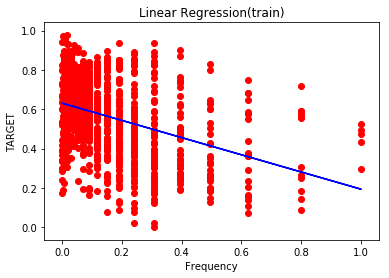

In [28]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),'b')

plt.xlabel("Frequency")
plt.ylabel("TARGET")
plt.title("Linear Regression(train)")

Text(0.5,1,'Linear Regression(test)')

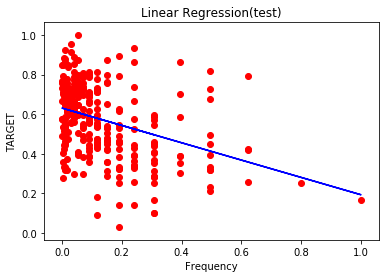

In [29]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regressor.predict(x_test),'b')

plt.xlabel("Frequency")
plt.ylabel("TARGET")
plt.title("Linear Regression(test)")

In [30]:
r2_score(y_test,y_pred)   # it tells that if there are 100 pts then 10 pts are fit correctly

0.16522343224465985

In [31]:
1-mean_squared_error(y_test,y_pred)

0.9713195685887261